# 使用DNN全连接神经网络模型

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# 载入MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# 将样本从整数转换为浮点数
x_train, x_test = x_train / 255.0, x_test / 255.0


# 使用tf.keras.Sequential来构建模型
# 使用全连接神经网络
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # shape(28, 28) ---> shape(784, )
    tf.keras.layers.Dense(128, activation='relu'), # 该Dense层有128个神经元
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') # 返回长度为10的logits数组, 
                                                    # 然后使用softmax得到标准化的概率向量
                                                    # 对应于手写数字的可能值
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 交叉熵损失函数
              metrics=['accuracy'])

# 训练并验证模型
model.fit(x_train, y_train, epochs=10)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1449 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9804
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9841
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.045

# 准确率

In [2]:
print('\nTest accuracy:', test_acc) # 输出准确率


Test accuracy: 0.9789000153541565


# 随机选择25张测试图片，绘制预测结果

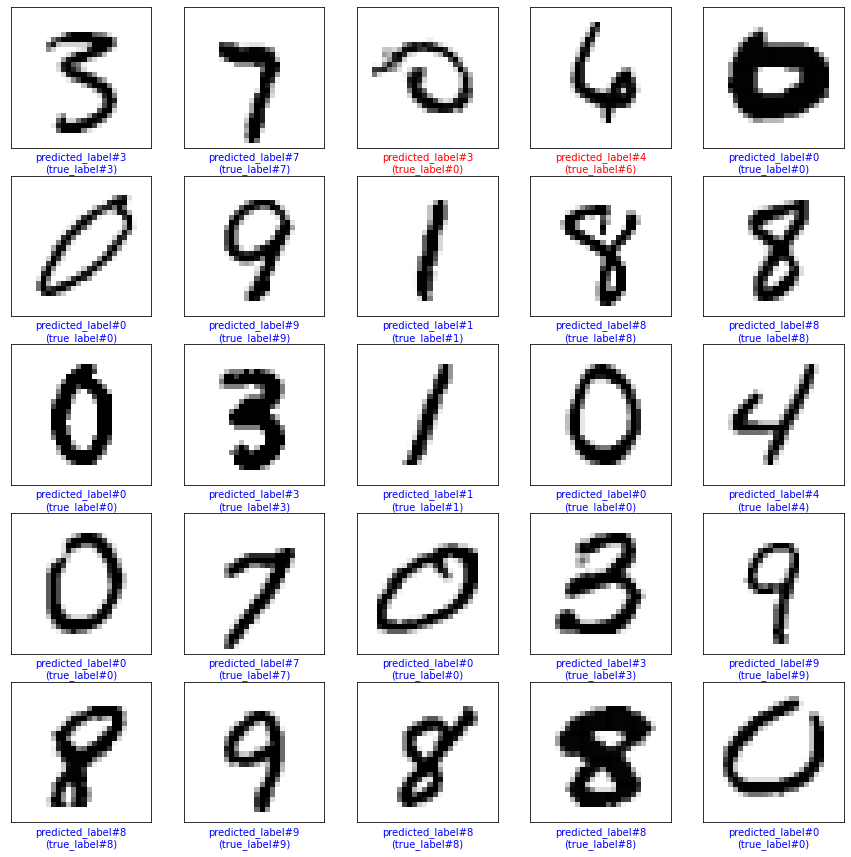

In [3]:
# 绘制一张图片
def plot_image(predicted_label, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    # 对于预测正确的，使用蓝色标识
    # 对于预测错误的，使用红色标识
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("predicted_label#{}\n(true_label#{})".format(predicted_label, true_label), color=color)

    
plt.figure(figsize=(15, 15))
# 随机选择25张测试图片，绘制预测结果
for i in range(25):
    random = np.random.randint(len(y_test) + 1) # 生成随机数
    img = x_test[random] # 随机选择一张图片
    predicted_label = np.argmax(model.predict(np.expand_dims(img, 0))) # 模型预测
    true_label = y_test[random]
    plt.subplot(5, 5, i+1)
    plot_image(predicted_label, true_label, img) # 绘制一张图片
plt.show()